In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 17 21:58:47 2017

@author: imtiaz
"""

import pandas as pd
from fastcluster import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA

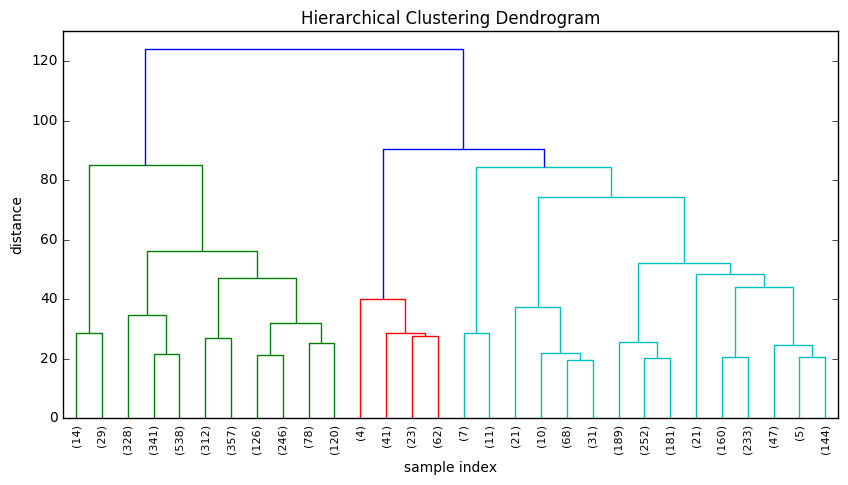

In [3]:
#Reading the data from an excel file
EastWestAirLinesCluster=pd.read_excel("EastWestAirlinesCluster.xlsx","data")
EastWestAirLinesCluster=EastWestAirLinesCluster.drop('ID#',1)
EastWestAirLinesCluster.head()

#Standardizing the data to avoid bias from large quantitative feature.
scaler = preprocessing.StandardScaler().fit(EastWestAirLinesCluster)
standardizedEastWestAirLinesCluster = scaler.transform(EastWestAirLinesCluster)

#Applying clustering mechanism with euclidean and ward metrics.
data_link = linkage(standardizedEastWestAirLinesCluster, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    data_link,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

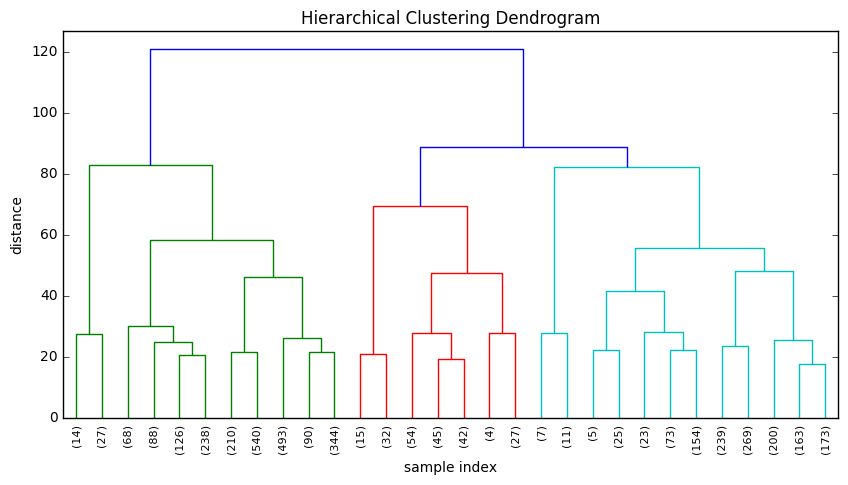

In [6]:
sample95=EastWestAirLinesCluster.sample(frac=0.95)
scaler95 = preprocessing.StandardScaler().fit(sample95)
standardizedEastWestAirLinesCluster95 = scaler95.transform(sample95)

data_link2 = linkage(standardizedEastWestAirLinesCluster95, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    data_link2,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    # font size for the x axis labels
)
plt.show()

In [23]:
#cluster Centroids
clusters=fcluster(data_link, 3, criterion='maxclust')
cluster1=EastWestAirLinesCluster[clusters==1]
cluster2=EastWestAirLinesCluster[clusters==2]
cluster3=EastWestAirLinesCluster[clusters==3]

cluster1.apply(np.mean,0)
cluster2.apply(np.mean,0)
cluster3.apply(np.mean,0)



kmeans = KMeans(n_clusters=3, random_state=0).fit(standardizedEastWestAirLinesCluster)
labels=kmeans.labels_
kcluster1=EastWestAirLinesCluster[labels==0]
kcluster2=EastWestAirLinesCluster[labels==1]
kcluster3=EastWestAirLinesCluster[labels==2]

kcluster1.apply(np.mean,0)
kcluster2.apply(np.mean,0)
kcluster3.apply(np.mean,0)


wineData=pd.read_csv("winedata.csv")
wineData.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
sklearn_pca=PCA(n_components=5)
X = wineData.ix[:,1:14].values
y = wineData.ix[:,0].values

scaler = preprocessing.StandardScaler().fit(X)
X_std = scaler.transform(X)
Y_sklearn = sklearn_pca.fit_transform(X_std)
#80 percent of the variance is explained by the five principal components.
sum(sklearn_pca.explained_variance_ratio_[:5])*100
components=pd.DataFrame(sklearn_pca.components_)
components.columns=wineData.columns[1:14]
components

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,-0.144329,0.245188,0.002051,0.239320,-0.141992,-0.394661,-0.422934,0.298533,-0.313429,0.088617,-0.296715,-0.376167,-0.286752
1,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,0.017856,-0.536890,0.214176,-0.060859,0.351797,-0.198068,-0.152295,0.203301,-0.399057,-0.065926,0.427771,-0.184121,0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869


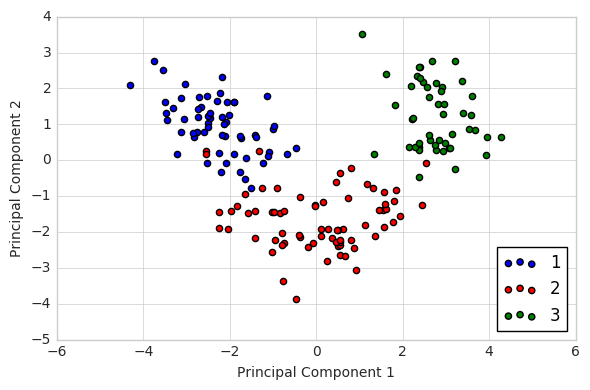

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((1, 2, 3),('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

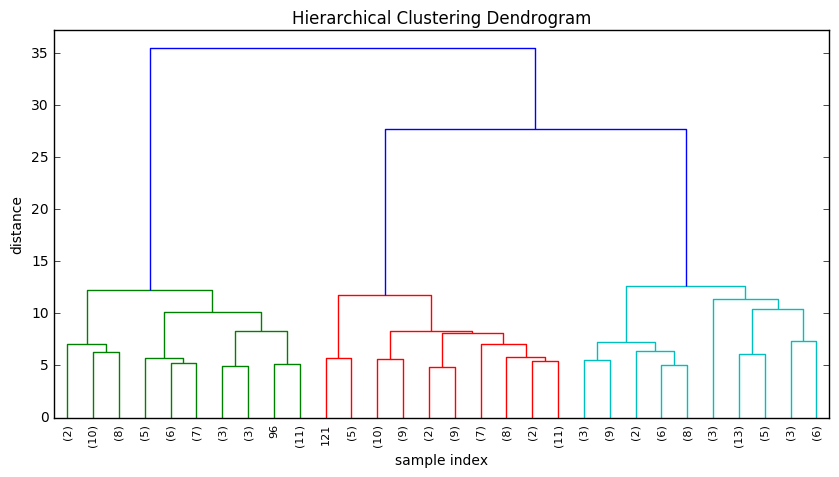

In [26]:
#cluster analysis of wine data
scalerWineData = preprocessing.StandardScaler().fit(X)
std_WineData = scalerWineData.transform(X)

#Applying clustering mechanism with euclidean and ward metrics.
data_link = linkage(std_WineData, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    data_link,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

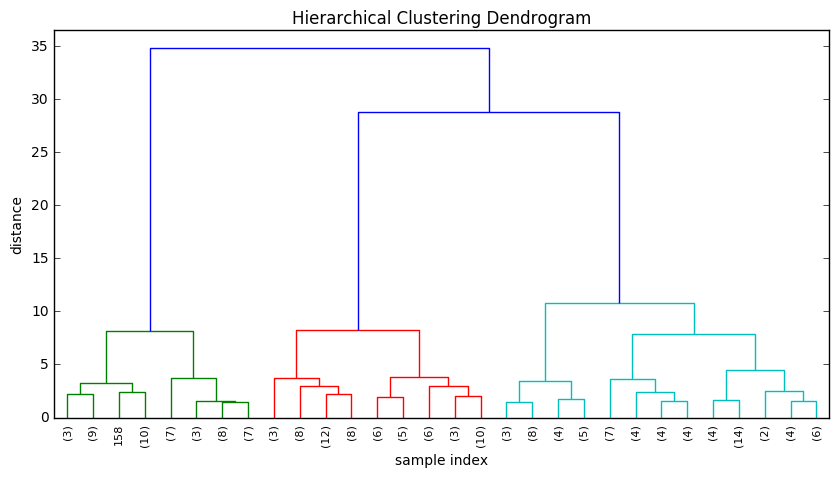

In [27]:
#cluster analysis of wine data with two most significant principal components
pca=PCA(n_components=2)
X = wineData.ix[:,1:14].values
y = wineData.ix[:,0].values

scaler = preprocessing.StandardScaler().fit(X)
X_std = scaler.transform(X)
tranformedWineData = pca.fit_transform(X_std)

wine_dataLink = linkage(tranformedWineData, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    wine_dataLink,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()